<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1">
                    <span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span>
            <ul class="toc-item"><li><span><a href="#Импорт" data-toc-modified-id="Импорт-1.1">
                <span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт</a></span></li>
                <li><span><a href="#Описание" data-toc-modified-id="Описание-1.2">
                    <span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание</a></span></li>
                <li><span><a href="#Проверка-аномалий-и-выбросов" data-toc-modified-id="Проверка-аномалий-и-выбросов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка аномалий и выбросов</a></span></li>
                <li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li>
                <li><span><a href="#Заполенение-пропусков" data-toc-modified-id="Заполенение-пропусков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Заполнение пропусковk</a></span></li>
                <li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Проверка на мультиколлинеарность</a></span></li>
                <li><span><a href="#Стандартизация-признаков" data-toc-modified-id="Стандартизация-признаков-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Стандартизация признаков</a></span></li></ul></li>
        <li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span>
            <ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Linear Regression</a></span></li>
                <li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ridge Regression</a></span></li>
                <li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random Forest Regression</a></span></li>
                <li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li>
     <li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item">
         <li><span><a href="#Сравнение" data-toc-modified-id="Сравнение-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сравнение</a></span></li>
         <li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Важность признаков</a></span></li>             
         <li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li>
    </ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

### Импорт

Импортируем необходимые для работы библиотеки. Считаем данные из csv-файла в датафрейм, сохраним в переменную `data` и выведем на экран первые десять строк и общую информацию о датасете.

In [2]:
# miscellaneous
import time

# data analysis
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from category_encoders import MEstimateEncoder
from sklearn.linear_model import (
    LinearRegression,
    Ridge)

from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler)

from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    cross_val_score,
    train_test_split)

In [3]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv')
except:
    data = pd.read_csv('autos.csv')
    
data.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


### Описание

Выведем общую информацию о датасете.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

В датасете 15 столбцов и 354369 строк. При этом в признаках `VehicleType`, `Gearbox`, `Model`, `FuelType`, `Repaired` есть пропущенные значения. Типы столбцов `DateCrawled`, `DateCreated`, `LastSeen` можно сконвертировать в даты, остальные столбцы в порядке.

Признаки
- `DateCrawled` — дата скачивания анкеты из базы;
- `VehicleType` — тип автомобильного кузова, категориальный признак;
- `RegistrationYear` — год регистрации автомобиля, количественный дискретный признак;
- `Gearbox` — тип коробки передач, категориальный признак;
- `Power` — мощность (л. с.), количественный непрерывный признак;
- `Model` — модель автомобиля, категориальный признак;
- `Kilometer` — пробег (км), количественный непрерывный признак;
- `RegistrationMonth` — месяц регистрации автомобиля, категориальный признак;
- `FuelType` — тип топлива, категориальный признак;
- `Repaired` — была машина в ремонте или нет, бинарный признак;
- `DateCreated` — дата создания анкеты;
- `NumberOfPictures` — количество фотографий автомобиля, количественный дискретный признак;
- `PostalCode` — почтовый индекс владельца анкеты (пользователя), категориальный признак;
- `LastSeen` — дата последней активности пользователя.

Целевой признак
- `Price` — цена (евро), количественный непрерывный признак.

Целевой признак является количественным и непрерывным, перед нами регрессионная задача обучения с учителем. Проведем исследовательский анализ данных: выведем метрики данных и построим гистограммы признаков.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
RegistrationYear,354369.0,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
Power,354369.0,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
Kilometer,354369.0,128211.172535,37905.341530,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,354369.0,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
NumberOfPictures,354369.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PostalCode,354369.0,50508.689087,25783.096248,1067.0,30165.0,49413.0,71083.0,99998.0


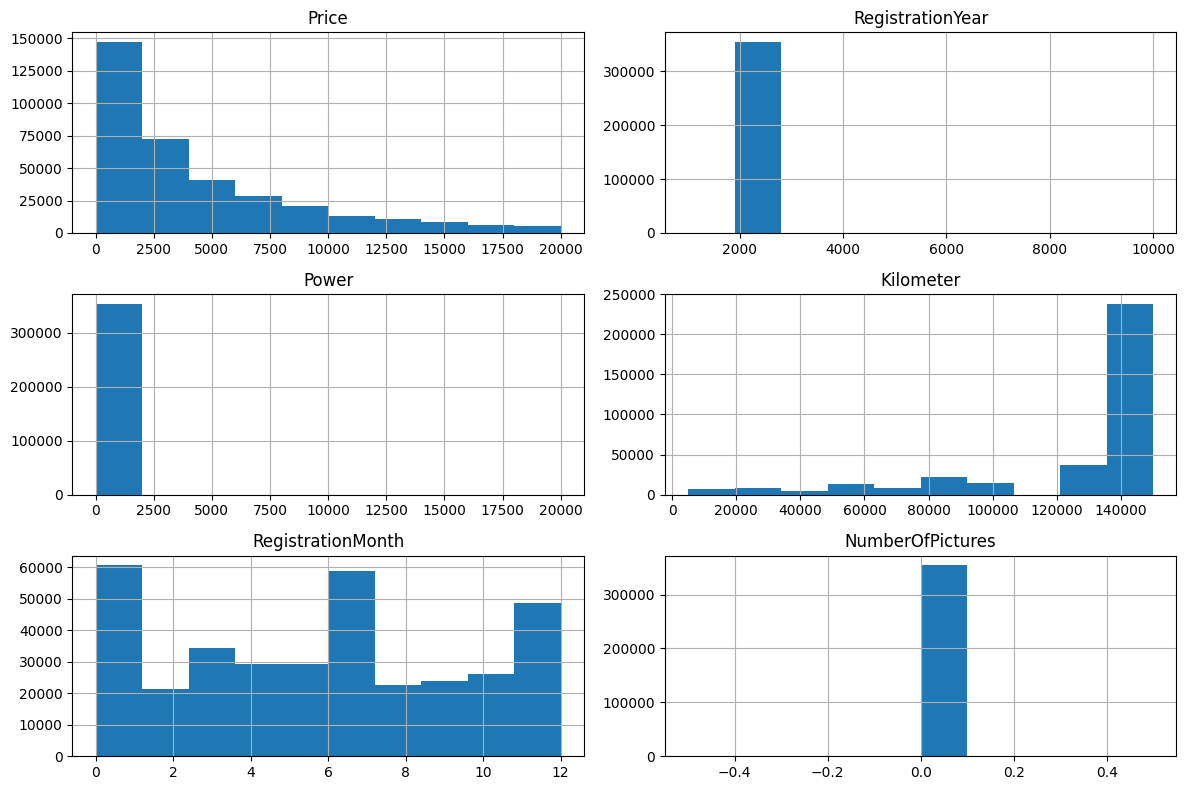

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
# убираем PostalCode, этот признак будет показан далее
data.drop(['PostalCode'], axis=1).hist(ax=ax)
fig.tight_layout();

В признаках можно отметить странные значения:
- нулевые цены;
- некоторые автомобили зарегистрированы во времена крестовых походов или grim dark future;
- нулевая мощность двигателя;
- мощность двигателя 20000 л.с.;
- месяц регистрации автомобиля нулевой;
- у всех объектов отсутствуют фотографии.

Сконвертируем столбцы, содержащие даты.

In [7]:
data['DateCrawled'] = pd.to_datetime(data['DateCrawled'])
data['DateCreated'] = pd.to_datetime(data['DateCreated'])
data['LastSeen'] = pd.to_datetime(data['LastSeen'])

# Проверка
data[['DateCrawled', 'DateCreated', 'LastSeen']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DateCrawled  354369 non-null  datetime64[ns]
 1   DateCreated  354369 non-null  datetime64[ns]
 2   LastSeen     354369 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 8.1 MB


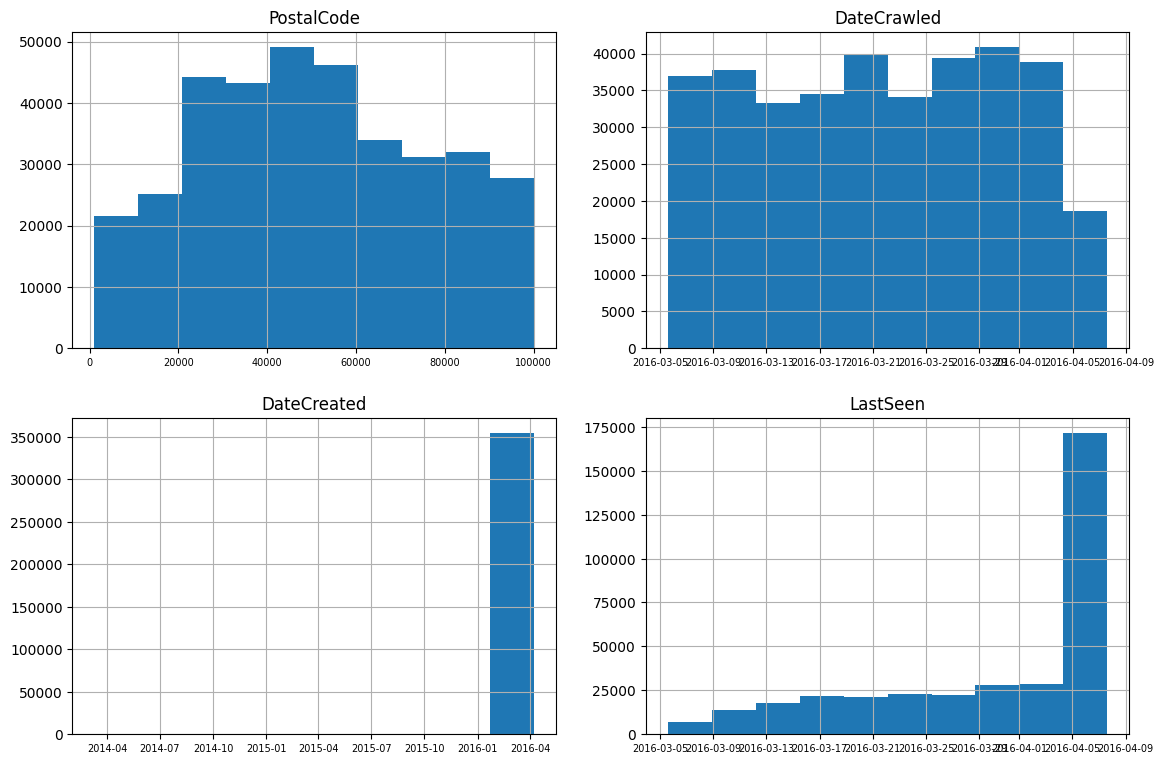

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
data[['PostalCode','DateCrawled', 'DateCreated', 'LastSeen']].hist(ax=ax, xlabelsize=7)
fig.tight_layout(pad=2);

Можно отметить, что в датах создания анкеты есть выбросы.

In [9]:
data.describe(include=['O']).T

,count,unique,top,freq
VehicleType,316879,8,sedan,91457
Gearbox,334536,2,manual,268251
Model,334664,250,golf,29232
FuelType,321474,7,petrol,216352
Brand,354369,40,volkswagen,77013
Repaired,283215,2,no,247161


In [10]:
data['VehicleType'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

In [11]:
data['Brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'toyota', 'chevrolet', 'dacia',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'rover', 'land_rover', 'lada'], dtype=object)

In [12]:
data['FuelType'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

Типы автомобилей и бренды имеют уникальные названия, а вот виды топлива `petrol` и `gasoline` являются синонимами. Следует объединить эти два класса. Также можно отметить, что пропуски присутствуют только в категориальных признаках.

По итогам поверхностного анализа данных можно запланировать следующие шаги:
- проверка аномалий и выбросов;
- проверка на дубликаты;
- заполнение пропусков.

### Проверка аномалий и выбросов

Установим последний год в признаке DataCrawled и ограничим выборку тридцатью годами в прошлое.

In [13]:
'''
Функция для проверки количества удаленных строк.
Принимает длину датасета, вычисляет новую длину после удаления строк и выводит разницу.
'''

def delete_count(length):
    deleted = length - data.shape[0]
    print(f'Удалено {deleted} строк(и) из {length} ({round(deleted*100/length, 2)}%)')
    return data.shape[0]

In [14]:
data.sort_values(
    by='DateCrawled',
    ascending=False).head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
90713,2016-04-07 14:36:58,3500,sedan,1999,manual,143,e_klasse,150000,8,gasoline,mercedes_benz,no,2016-04-07,0,64846,2016-04-07 14:36:58
339649,2016-04-07 14:36:56,8650,suv,1992,manual,121,wrangler,125000,5,petrol,jeep,no,2016-04-07,0,20357,2016-04-07 14:36:56
301030,2016-04-07 14:36:55,15200,wagon,2008,manual,190,a6,150000,9,gasoline,audi,no,2016-04-07,0,81476,2016-04-07 14:36:55
53739,2016-04-07 14:36:54,400,small,1996,manual,60,ibiza,150000,0,NaN,seat,NaN,2016-04-07,0,66299,2016-04-07 14:36:54
204218,2016-04-07 14:36:53,6990,coupe,1979,auto,143,3er,150000,6,petrol,bmw,no,2016-04-07,0,71336,2016-04-07 14:36:53


Таким образом, рассматривать будем автомобили с регистрацией от 1986 до 2016 года.

In [15]:
data_len = data.shape[0]
data = data.query('RegistrationYear > 1986 and RegistrationYear < 2016')
data_len = delete_count(data_len)

Удалено 30871 строк(и) из 354369 (8.71%)


Далее рассмотрим автомобили с нулевой мощностью двигателя. Примем допущение, что автомобили с нулевой мощностью либо не на ходу, либо произошла ошибка при вводе данных. Логично, что неисправная машина стоит дешевле исправной. Выведем квинтили цен на авто, у которых мощность двигателя больше нуля.

In [16]:
_, intervals = pd.qcut(data[data['Power'] != 0]['Price'], q=5, retbins=True, labels=False)
pd.DataFrame(columns=['0%', '20%', '40%', '60%', '80%', '100%'], data=[intervals], index=['Цена'])

,0%,20%,40%,60%,80%,100%
Цена,0.0,1000.0,2200.0,4250.0,8150.0,20000.0


Таким образом, будем считать автомобили с нулевой мощностью и ценой более 1000 евро ошибкой ввода и удалим их.

In [17]:
data = data.query('(Power == 0 and Price < 1000) or Power != 0 ')
data_len = delete_count(data_len)

Удалено 16408 строк(и) из 323498 (5.07%)


Нулевой месяц регистрации автомобиля может быть обусловлен отсутствием данных или ошибкой ввода. Проверим количество таких объектов.

In [18]:
data.query('RegistrationMonth == 0').shape[0]

25077

Достаточно много, удалять нельзя. Будем считать нулевой месяц отдельной категорией, случаем отсутствия данных. Оставим этот признак как есть.

Разберемся с нулевой ценой. Выше мы приняли допущение, что автомобили с нулевой мощностью могут стоить менее 999 евро, в это количество также входят автомобили с нулевой стоимостью. Проверим как связаны нулевая стоимость с годом регистрации и пробегом.

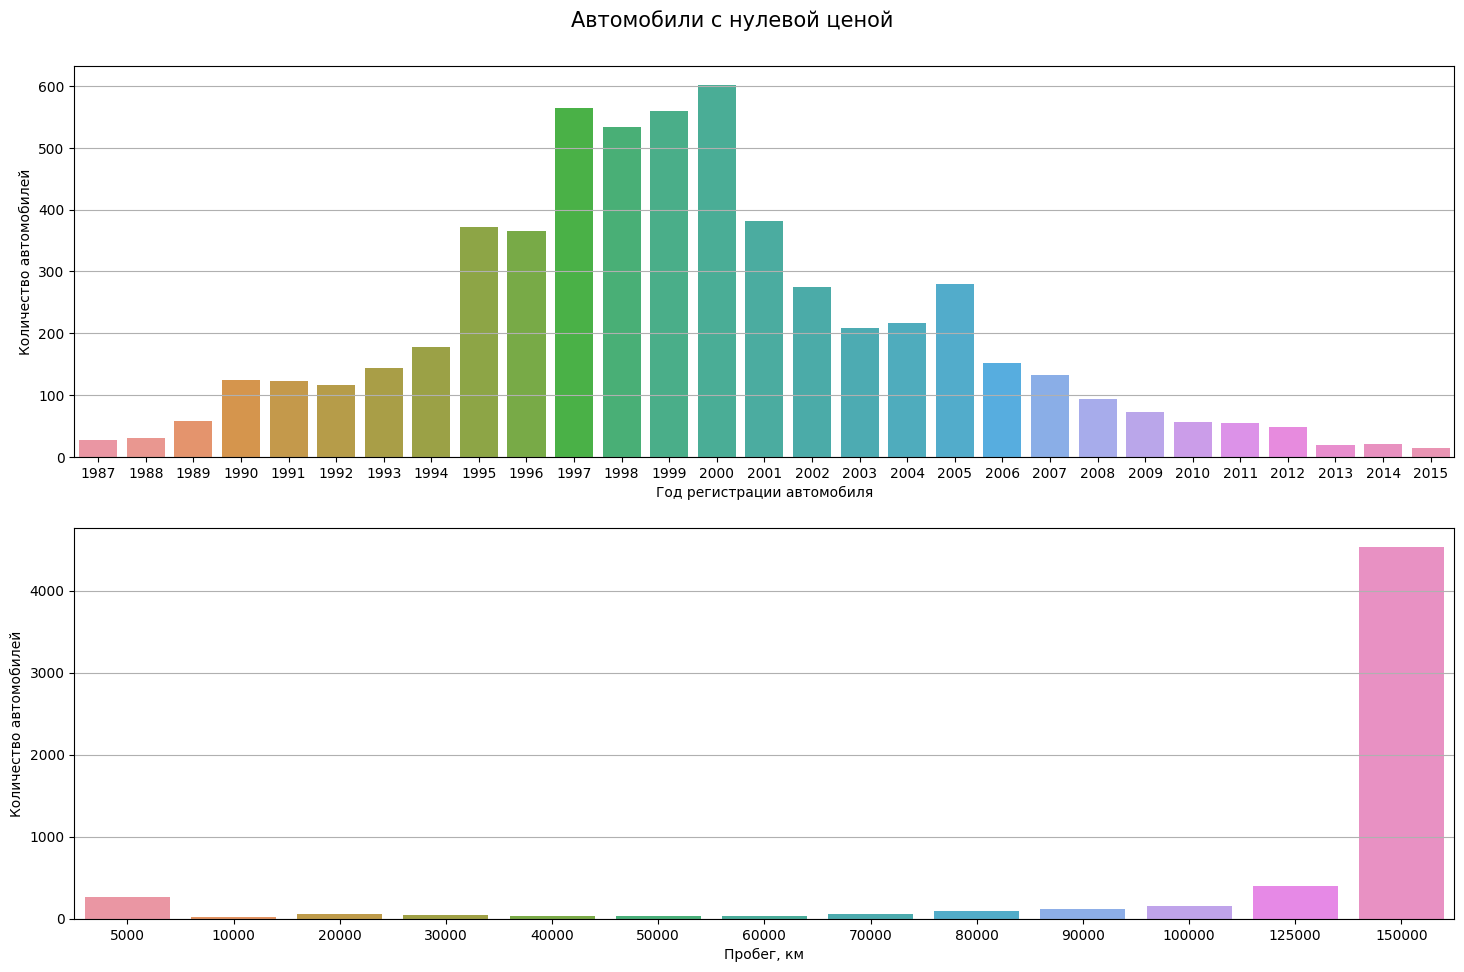

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
[ax[i].grid() for i in range(2)]
plt.suptitle('Автомобили с нулевой ценой', fontsize=15)

sns.countplot(x = data.query('Price == 0 and Power > 0')['RegistrationYear'], ax=ax[0])
ax[0].set_ylabel('Количество автомобилей')
ax[0].set_xlabel('Год регистрации автомобиля')

sns.countplot(x = data.query('Price == 0 and Power > 0')['Kilometer'], ax=ax[1])
ax[1].set_ylabel('Количество автомобилей')
ax[1].set_xlabel('Пробег, км')

fig.tight_layout(pad=2);

Заметно, что минимальную оценку в основном получили автомобили с пробегом 150000 км и с годом регистрации в интервале 1997 - 2000 гг.

Сформулируем следующее правило: выбросом считается объект, имеющий нулевую цену при ненулевой мощности двигателя и пробеге менее 100000 км. Удалим подобные объекты.

In [20]:
data = data.query('Price > 0 or (Price == 0 and Power > 0 and Kilometer < 100000)')
data_len = delete_count(data_len)

Удалено 8075 строк(и) из 307090 (2.63%)


Так как фотографии отсутствуют у всех объектов, смысла в этом признаке нет, его можно удалить.

In [21]:
data.drop('NumberOfPictures', axis=1, inplace=True)

Проверим как распределяются мощности двигателя в ящике с усами.

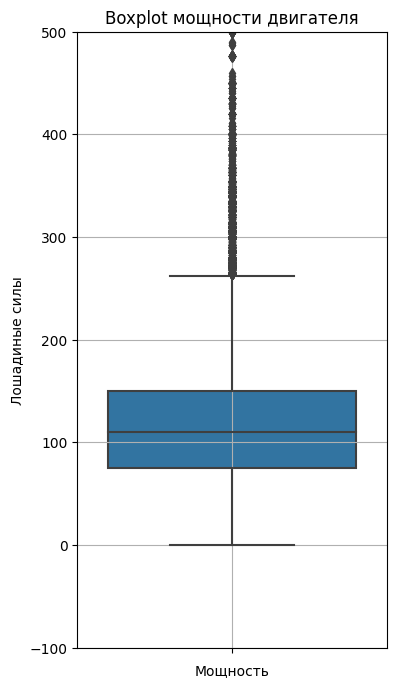

In [22]:
fig, ax = plt.subplots(figsize=(4, 8))
sns.boxplot(y=data['Power'])
ax.grid();
ax.set_ylim(-100, 500)
ax.set_ylabel('Лошадиные силы')
ax.set_xlabel('Мощность')
ax.set_title('Boxplot мощности двигателя');

Выбросов немало, удалим объекты со странными мощностями.

In [23]:
# Q3 + 1.5 * (Q3 - Q1)
border = (
    np.percentile(data['Power'], 75)
    - np.percentile(data['Power'], 25)) * 1.5 + np.percentile(data['Power'], 75) 
print(f'Верхняя граница мощности двигателя: {border} л.с.')

data = data.query('Power < @border')
data_len = delete_count(data_len)

Верхняя граница мощности двигателя: 262.5 л.с.
Удалено 6175 строк(и) из 299015 (2.07%)


### Проверка на дубликаты

Объединим два вида топлива в один.

In [24]:
data.loc[data['FuelType'] == "gasoline", 'FuelType'] = "petrol"
# проверка
data['FuelType'].unique()

array(['petrol', nan, 'lpg', 'other', 'hybrid', 'cng', 'electric'],
      dtype=object)

Проверим датафреймы на явные дубликаты.

In [25]:
# приведение к нижнему регистру
data = data.applymap(lambda s: s.lower() if type(s) == str else s)

data.duplicated().sum()

4

In [26]:
data[data.duplicated(keep=False)]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
41529,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,petrol,volkswagen,no,2016-03-18,36391,2016-03-18 18:46:15
88087,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08,89518,2016-03-09 09:46:57
90964,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28,66589,2016-03-28 08:46:21
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08,89518,2016-03-09 09:46:57
187735,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03,75196,2016-04-07 09:44:54
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,petrol,volkswagen,no,2016-03-18,36391,2016-03-18 18:46:15


Удалим явные дубликаты и проверим датасет на неявные, а также на спецсимволы.

In [27]:
data.drop_duplicates(inplace=True)
data_len = delete_count(data_len)

Удалено 4 строк(и) из 292840 (0.0%)


In [28]:
# переменная, которая содержит все спецсимволы, кроме подчеркивания
temp = '"!@#$%^&*()-+?=,<>/` ' + "'"

# вспомогательный датафрейм
symbols = pd.DataFrame()
for i in temp:
    if data['Model'].str.contains(pat=i, regex=False).sum() > 0:
        symbols = pd.concat([
            symbols, data[data['Model'].str.contains(pat=i, regex=False) == True]])
if symbols.empty:
    print('Спецсимволы не обнаружены')
else: symbols

Спецсимволы не обнаружены


In [29]:
# создаем признак с названиями моделей, но без подчеркиваний
data['model_check'] = data['Model']
data['model_check'].replace({'_':''}, regex=True, inplace=True)

# проверка на явные дубликаты без подчеркиваний
data.drop('Model', axis=1).duplicated().sum()

0

In [30]:
# проверка на неявные дубликаты по ключевым столбцам
dupl = ['model_check', 'Brand', 'RegistrationYear',
        'VehicleType', 'PostalCode', 'Power', 'RegistrationMonth', 'Kilometer',
        'Gearbox', 'FuelType']

data.duplicated(subset=dupl).sum()

34183

Будем считать, что наиболее актуальная информация содержится в объектах с более поздним `DateCreated`.

In [31]:
# сортируем датасет, чтобы более поздние даты оказались ниже
# из дубликатов оставляем последние
data.sort_values(by='DateCreated', inplace=True)
data.drop_duplicates(subset=dupl, inplace=True, keep='last')

data_len = delete_count(data_len)

Удалено 34183 строк(и) из 292836 (11.67%)


In [32]:
# удаляем временный признак
data.drop('model_check', axis=1, inplace=True)

### Заполнение пропусков

Заполним пропуски в признаках `VehicleType`, `Gearbox`, `Model`, `FuelType` и `Repaired`.

Тип кузова заполним по наиболее встречающимся кузовам среди брендов.

In [33]:
'''
Функция для заполнения пропусков.
Принимает название столбца, в которм есть пропуски.
Выводит таблицу по брендам и выбранному признаку, далее формирует словарь,
с модами для каждого бренда, и также выводит его на экран.
Далее заменяет пропуски в выбранном столбце с помощью словаря.
'''

def fill_data(column):
    
    # создаем и выводим таблицу с брендом
    table = data.pivot_table(values='Price', index='Brand', columns=column, aggfunc='count')
    display(table.head())
    
    # заполняем NaN, чтобы idxmax сработал
    table.fillna(value=0)
    
    # создаем словарь из индексов и наиболее часто встречающихся значений для каждого бренда
    table['max'] = table.idxmax(axis=1)
    table_dict = dict(zip(table.index, table['max']))
    print(table_dict)
    
    # запоминаем индексы с пропусками
    temp = data[column].isna()

    # записываем вместо пропусков значения столбца бренд, а затем заменяем эти значения на словарные
    data.loc[temp, column] = data.loc[temp, 'Brand']
    data.loc[temp, column] = data.loc[temp, column].map(table_dict)
    data[temp].head()

In [34]:
fill_data('VehicleType')

VehicleType,bus,convertible,coupe,other,sedan,small,suv,wagon
Brand,,,,,,,,
alfa_romeo,NaN,124.0,182.0,11.0,772.0,209.0,NaN,382.0
audi,8.0,1381.0,1164.0,80.0,8353.0,1205.0,83.0,8836.0
bmw,4.0,2599.0,2813.0,197.0,13405.0,371.0,540.0,6278.0
chevrolet,128.0,10.0,24.0,17.0,163.0,469.0,227.0,84.0
chrysler,353.0,197.0,34.0,7.0,216.0,11.0,12.0,205.0


{'alfa_romeo': 'sedan', 'audi': 'wagon', 'bmw': 'sedan', 'chevrolet': 'small', 'chrysler': 'bus', 'citroen': 'small', 'dacia': 'wagon', 'daewoo': 'small', 'daihatsu': 'small', 'fiat': 'small', 'ford': 'small', 'honda': 'sedan', 'hyundai': 'small', 'jaguar': 'sedan', 'jeep': 'suv', 'kia': 'suv', 'lada': 'suv', 'lancia': 'small', 'land_rover': 'suv', 'mazda': 'sedan', 'mercedes_benz': 'sedan', 'mini': 'small', 'mitsubishi': 'sedan', 'nissan': 'small', 'opel': 'small', 'peugeot': 'small', 'porsche': 'convertible', 'renault': 'small', 'rover': 'sedan', 'saab': 'sedan', 'seat': 'small', 'skoda': 'wagon', 'smart': 'small', 'sonstige_autos': 'suv', 'subaru': 'wagon', 'suzuki': 'small', 'toyota': 'small', 'trabant': 'sedan', 'volkswagen': 'sedan', 'volvo': 'wagon'}


In [35]:
fill_data('Model')

Model,100,145,147,156,159,1_reihe,1er,200,2_reihe,300c,...,wrangler,x_reihe,x_trail,x_type,xc_reihe,yaris,yeti,ypsilon,z_reihe,zafira
Brand,,,,,,,,,,,,,,,,,,,,,
alfa_romeo,NaN,39.0,441.0,487.0,175.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
audi,279.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmw,NaN,NaN,NaN,NaN,NaN,NaN,2825.0,NaN,NaN,NaN,...,NaN,1176.0,NaN,NaN,NaN,NaN,NaN,NaN,583.0,NaN
chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chrysler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{'alfa_romeo': '156', 'audi': 'a4', 'bmw': '3er', 'chevrolet': 'other', 'chrysler': 'other', 'citroen': 'other', 'dacia': 'logan', 'daewoo': 'matiz', 'daihatsu': 'cuore', 'fiat': 'punto', 'ford': 'focus', 'honda': 'civic', 'hyundai': 'i_reihe', 'jaguar': 'x_type', 'jeep': 'grand', 'kia': 'other', 'lada': 'niva', 'lancia': 'ypsilon', 'land_rover': 'freelander', 'mazda': '6_reihe', 'mercedes_benz': 'c_klasse', 'mini': 'cooper', 'mitsubishi': 'colt', 'nissan': 'micra', 'opel': 'corsa', 'peugeot': '2_reihe', 'porsche': 'boxster', 'renault': 'twingo', 'rover': 'other', 'saab': 'other', 'seat': 'ibiza', 'skoda': 'octavia', 'smart': 'fortwo', 'subaru': 'impreza', 'suzuki': 'other', 'toyota': 'yaris', 'trabant': '601', 'volkswagen': 'golf', 'volvo': 'v40'}


In [36]:
fill_data('Gearbox')

Gearbox,auto,manual
Brand,,
alfa_romeo,113.0,1578.0
audi,6093.0,15113.0
bmw,7463.0,18814.0
chevrolet,323.0,798.0
chrysler,546.0,490.0


{'alfa_romeo': 'manual', 'audi': 'manual', 'bmw': 'manual', 'chevrolet': 'manual', 'chrysler': 'auto', 'citroen': 'manual', 'dacia': 'manual', 'daewoo': 'manual', 'daihatsu': 'manual', 'fiat': 'manual', 'ford': 'manual', 'honda': 'manual', 'hyundai': 'manual', 'jaguar': 'auto', 'jeep': 'auto', 'kia': 'manual', 'lada': 'manual', 'lancia': 'manual', 'land_rover': 'manual', 'mazda': 'manual', 'mercedes_benz': 'auto', 'mini': 'manual', 'mitsubishi': 'manual', 'nissan': 'manual', 'opel': 'manual', 'peugeot': 'manual', 'porsche': 'manual', 'renault': 'manual', 'rover': 'manual', 'saab': 'manual', 'seat': 'manual', 'skoda': 'manual', 'smart': 'auto', 'sonstige_autos': 'manual', 'subaru': 'manual', 'suzuki': 'manual', 'toyota': 'manual', 'trabant': 'manual', 'volkswagen': 'manual', 'volvo': 'manual'}


In [37]:
fill_data('FuelType')

FuelType,cng,electric,hybrid,lpg,other,petrol
Brand,,,,,,
alfa_romeo,NaN,NaN,NaN,27.0,NaN,1607.0
audi,NaN,2.0,1.0,310.0,1.0,20196.0
bmw,7.0,2.0,NaN,493.0,4.0,24853.0
chevrolet,4.0,NaN,NaN,127.0,NaN,966.0
chrysler,NaN,NaN,NaN,71.0,NaN,928.0


{'alfa_romeo': 'petrol', 'audi': 'petrol', 'bmw': 'petrol', 'chevrolet': 'petrol', 'chrysler': 'petrol', 'citroen': 'petrol', 'dacia': 'petrol', 'daewoo': 'petrol', 'daihatsu': 'petrol', 'fiat': 'petrol', 'ford': 'petrol', 'honda': 'petrol', 'hyundai': 'petrol', 'jaguar': 'petrol', 'jeep': 'petrol', 'kia': 'petrol', 'lada': 'petrol', 'lancia': 'petrol', 'land_rover': 'petrol', 'mazda': 'petrol', 'mercedes_benz': 'petrol', 'mini': 'petrol', 'mitsubishi': 'petrol', 'nissan': 'petrol', 'opel': 'petrol', 'peugeot': 'petrol', 'porsche': 'petrol', 'renault': 'petrol', 'rover': 'petrol', 'saab': 'petrol', 'seat': 'petrol', 'skoda': 'petrol', 'smart': 'petrol', 'sonstige_autos': 'petrol', 'subaru': 'petrol', 'suzuki': 'petrol', 'toyota': 'petrol', 'trabant': 'petrol', 'volkswagen': 'petrol', 'volvo': 'petrol'}


В признаке `Repaired` заполним пропуски значением `unknown`.

In [38]:
data['Repaired'].fillna('unknown', inplace=True)
# проверка
data.isna().sum()

DateCrawled             0
Price                   0
VehicleType             0
RegistrationYear        0
Gearbox                 0
Power                   0
Model                1324
Kilometer               0
RegistrationMonth       0
FuelType                0
Brand                   0
Repaired                0
DateCreated             0
PostalCode              0
LastSeen                0
dtype: int64

В модели остались незаполненные значения, скорее всего это связано с брендом.

In [39]:
data.query("Model.isna()").head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
94838,2016-03-05 14:50:35,999,suv,2015,manual,0,NaN,5000,0,petrol,sonstige_autos,unknown,2016-02-03,19249,2016-04-05 11:45:25
291861,2016-03-06 03:43:15,2900,convertible,2002,auto,10,NaN,30000,6,petrol,sonstige_autos,no,2016-02-29,8132,2016-03-10 15:45:22
331067,2016-03-05 16:56:42,10900,small,2014,auto,5,NaN,20000,3,petrol,sonstige_autos,no,2016-03-03,86462,2016-04-06 17:17:02
80184,2016-03-05 14:14:14,4850,suv,2001,auto,238,NaN,150000,5,lpg,sonstige_autos,no,2016-03-03,65232,2016-03-08 16:52:08
194163,2016-03-05 14:21:42,8900,suv,2015,manual,50,NaN,5000,4,petrol,sonstige_autos,no,2016-03-04,56335,2016-04-06 00:47:06


In [40]:
# количество моделей бренда sonstige_autos
data.query("Brand == 'sonstige_autos'")['Model'].isna().sum()

1324

Таким образом для бренда sonstige_autos все модели неизвестны. В таком случае укажем модель 'sonstige' для всех оставшися пропусков.

In [41]:
data['Model'].fillna('sonstige', inplace=True)
data.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
DateCreated          0
PostalCode           0
LastSeen             0
dtype: int64

Все пропуски обработаны. Проверим еще раз на неявные дубликаты и в случае обнаружения удалим их.

In [42]:
# проверка на неявные дубликаты по ключевым столбцам

dupl = ['Model', 'Brand', 'RegistrationYear',
        'VehicleType', 'PostalCode', 'Power', 'RegistrationMonth', 'Kilometer',
        'Gearbox', 'FuelType']
data.duplicated(subset=dupl).sum()

2348

In [43]:
data.sort_values(by='DateCreated', inplace=True)
data.drop_duplicates(subset=dupl, inplace=True, keep='last')

data_len = delete_count(data_len)

Удалено 2348 строк(и) из 258653 (0.91%)


Проверим, нет ли противоречий между `RegistrationYear` и `DateCreated`. Дата регистрации автомобиля не может быть больше, чем дата создания анкеты.

In [44]:
# создание вспомогательного признака с годом
data['Years'] = data['DateCreated'].dt.year
data.query('RegistrationYear > Years')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen,Years


Противоречий нет.

In [45]:
# удаляем вспомогательный признак
data.drop('Years', axis=1, inplace=True)

### Проверка на мультиколлинеарность

Необходимо исследовать корреляцию количественных признаков.

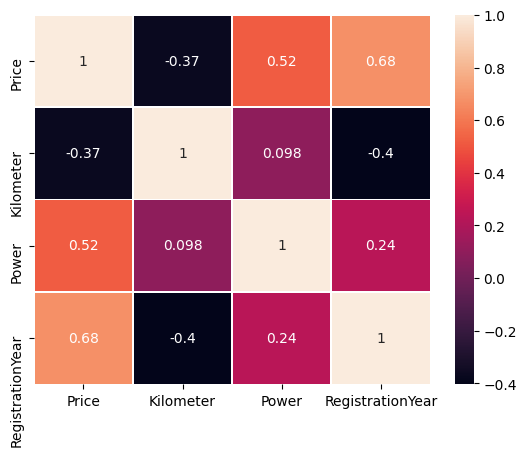

In [46]:
corr_matrix = data[['Price', 'Kilometer', 'Power', 'RegistrationYear']].corr()
sns.heatmap(corr_matrix, annot=True, linewidths=.5);

Заметно, что цена коррелирует с годом регистрации автомобиля и мощностью двигателя, что логично. Вмешательство не требуется.

### Стандартизация признаков

Используем метод OHE для категориальных признаков и StandardScaler для количественных.

In [90]:
# удалим столбцы с датами и почтовым адресом
data = data.drop(['DateCrawled', 'DateCreated', 'LastSeen', 'PostalCode'], axis=1, errors='ignore')

# разделим выборку на тренировочную и тестовую
features = data.drop('Price', axis=1)
target = data['Price']

# выпишем категориальные и количественные признаки
cat_features = ['VehicleType', 'Gearbox', 'FuelType',  'Repaired', 'RegistrationMonth']
numb_features = ['RegistrationYear', 'Power', 'Kilometer']
mee_features = ['Model', 'Brand']


X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=42)

In [51]:
print('Размерность тренировочной выборки:', X_train.shape)
print('Размерность тестовой выборки:', X_test.shape)

Размерность тренировочной выборки: (192228, 10)
Размерность тестовой выборки: (64077, 10)


In [123]:
# создаем трансформер и проверяем как он кодирует
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features),
    (StandardScaler(), numb_features),
    (MEstimateEncoder(), mee_features), remainder='passthrough',
    verbose_feature_names_out=False)

transformer_aux = make_column_transformer((StandardScaler(with_mean=False), [-1, -2]),
                                          remainder='passthrough',
                                          verbose_feature_names_out=False)


X_train_trans = pd.DataFrame.sparse.from_spmatrix(transformer.fit_transform(X_train, y_train),
    columns=transformer.get_feature_names_out())
#test = transformer_aux.fit_transform(transformer.fit_transform(X_train, y_train))

X_train_trans = pd.DataFrame(transformer_aux.fit_transform(X_train_trans),
    columns=transformer_aux.get_feature_names_out())


test = make_pipeline(transformer, transformer_aux)

#X_train_trans = pd.DataFrame.sparse.from_spmatrix(
#    transformer_aux.fit_transform(transformer.fit_transform(X_train, y_train)),
#    columns=transformer_aux.get_feature_names_out())

#XX = pd.DataFrame.sparse.from_spmatrix(transformer_aux.fit_transform(X_train_trans),
#    columns=transformer.get_feature_names_out())



X_train_trans.head()
#transformer.fit_transform(X_train, y_train)
#test
#pd.DataFrame.sparse.from_spmatrix(test.fit_transform(X_train, y_train))

,Brand,Model,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_wagon,Gearbox_manual,...,RegistrationMonth_6,RegistrationMonth_7,RegistrationMonth_8,RegistrationMonth_9,RegistrationMonth_10,RegistrationMonth_11,RegistrationMonth_12,RegistrationYear,Power,Kilometer
0,4.427327,2.711123,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.795127,1.133145,0.585634
1,1.630992,1.293797,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.485181,-0.334152,0.585634
2,2.095631,1.556487,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.526732,0.096255,-2.088333
3,3.172055,1.759797,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.668082,-0.216768,0.585634
4,4.013386,3.941093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.709633,-0.060257,0.585634


Признаки кодируются нормально, можно переходить к обучению моделей.

## Обучение моделей

Обучим следующие модели с различными гиперпараметрами:
- Linear Regression;
- Ridge Regression;
- Random Forest Regression;
- LightGBM;
- CatBoost.

Для оценки качества будем применять RMSE. Для каждой модели будем замерять время обучения и время предсказания.

In [94]:
'''
Функция для подсчета времени.
Принимает пайплайн или модель, скор на обучении и название модели для отображения.
Выводит время обучения, время предсказания и сохраняет данные в словарь.
'''
def timing(pipeline, score, name):
    start = time.time()
    pipeline.fit(X_train, y_train)
    end = time.time()
    fit_time = round(end - start, 3)
    print(f"Время на обучение: {fit_time} секунд(ы)")
    
    start = time.time()    
    answer = pipeline.predict(X_test)
    end = time.time()
    predict_time = round(end - start, 3)
    print(f"Время на предсказание: {predict_time} секунд(ы)")
    
    score_test = mean_squared_error(y_test, answer, squared = False)
    storage[name] = [score, fit_time, predict_time, score_test]

In [98]:
state = 42

'''
Функция для подбора гиперпараметров, содержит в себе функцию подсчета времени.
Принимает модель, вид поиска, гиперпараметры для перебора и название модели для отображения.
Строит пайплайн, запускает поиск гиперпараметров, выводит значения гиперпараметров и скор на обучении.
Возвращает лучший пайплайн и лучшую метрику.

search_type:
C - cross_val_score
G - GridSearchCV
R - RandomizedSearchCV
'''
def pipe(model, search_type, params, name):
    
    # ветка для cross_val_score
    if search_type == "C":      
        model = model
        pipeline = make_pipeline(transformer, transformer_aux, model)
        model_score = cross_val_score(
            pipeline, X_train, y_train, scoring='neg_root_mean_squared_error').mean() * (-1)
        # значение RMSE на кросс-валидации
        print(f'best_score: {model_score.round(1)}')
        
        return pipeline, model_score
    
    # ветка для GridSearchCV
    elif search_type == "G":
        model = model
        model.set_params(random_state=state)
        pipeline = make_pipeline(transformer, transformer_aux, model) 
        gs = GridSearchCV(
            pipeline, 
            param_grid=params, 
            scoring='neg_root_mean_squared_error', 
            n_jobs=-1,
            error_score='raise',
            verbose=2,
            cv=5
        )        
        gs.fit(X_train, y_train)
        
        #лучшее значение RMSE на кросс-валидации
        print(f'best_score: {gs.best_score_.round(1) * (-1)}')
        # лучшие гиперпараметры
        print(f'best_params: {gs.best_params_}') 
        
        pipeline = gs.best_estimator_
        
        timing(pipeline, gs.best_score_.round(1) * (-1), name)
        
        return pipeline, gs.best_score_.round(1) * (-1)

    # ветка для RandomizedSearchCV
    elif search_type == "R":
        model = model
        model.set_params(random_state=state)
        pipeline = make_pipeline(transformer, transformer_aux, model)
        rs = RandomizedSearchCV(
            pipeline,
            param_distributions=params, 
            scoring='neg_root_mean_squared_error', 
            n_jobs=-1,
            random_state=state,
            verbose=2,
            cv=5
        )
        rs.fit(X_train, y_train)
        # лучшее значение RMSE на кросс-валидации
        print(f'best_score: {rs.best_score_.round(1) * (-1)}')
        # лучшие гиперпараметры
        print(f'best_params: {rs.best_params_}')

        pipeline = rs.best_estimator_
        
        timing(pipeline, rs.best_score_.round(1) * (-1), name)
        
        return pipeline, rs.best_score_.round(1) * (-1)
        
    else: print('Введите верный search_type')

### Linear Regression

In [96]:
%%time
# в словарь записываются данные из всех моделей для сравнения
storage = {}

pipeline_LR, score_LR = pipe(LinearRegression(), 'C', params=None, name=None)
timing(pipeline_LR, score_LR, 'LR')

best_score: 2462.4
Время на обучение: 2.469 секунд(ы)
Время на предсказание: 0.294 секунд(ы)
CPU times: total: 14 s
Wall time: 13.9 s


### Ridge Regression

В модели Ridge Regression будем варьировать коэффициентом регуляризации.

In [99]:
%%time
param_grid_ridge = {
    'ridge__alpha': np.logspace(-2, 0, 5)}

pipeline_ridge, score_ridge = pipe(Ridge(), 'G', param_grid_ridge, 'Ridge')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best_score: 2462.5
best_params: {'ridge__alpha': 0.1}
Время на обучение: 2.42 секунд(ы)
Время на предсказание: 0.318 секунд(ы)
CPU times: total: 21.9 s
Wall time: 25.8 s


### Random Forest Regression

В модели случайного леса будем варьировать количеством дерьевьев и их глубиной.

In [100]:
%%time
param_grid_RF = {
    'randomforestregressor__n_estimators': range(10, 30, 10),
    'randomforestregressor__max_depth': range(2, 10, 2)
}

pipeline_RF, score_RF = pipe(RandomForestRegressor(), 'R', param_grid_RF, 'Random Forest')

C:\Users\Kirill.V.Gusev\.conda\envs\ds_practicum_env\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
best_score: 1793.4
best_params: {'randomforestregressor__n_estimators': 20, 'randomforestregressor__max_depth': 8}
Время на обучение: 40.901 секунд(ы)
Время на предсказание: 0.428 секунд(ы)
CPU times: total: 1min 56s
Wall time: 3min 16s


### LightGBM

В модели LightGBM будем варьировать темпом обучения и количеством листьев.

In [114]:
%%time
param_grid_lgbm = {
    'lgbmregressor__num_leaves': range(10, 50, 10),
    'lgbmregressor__learning_rate': np.logspace(-1, 0, 5),
}

pipeline_lgbm, score_lgbm = pipe(lgb.LGBMRegressor(), 'G', param_grid_lgbm, "LightGBM")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score: 1499.6
best_params: {'lgbmregressor__learning_rate': 0.31622776601683794, 'lgbmregressor__num_leaves': 40}
Время на обучение: 2.8 секунд(ы)
Время на предсказание: 0.398 секунд(ы)
CPU times: total: 1min 31s
Wall time: 1min 23s


### CatBoost

В модели CatBoost будем варьировать темпом обучения и глубиной дерева.

In [115]:
%%time
param_grid_cat = {
    'catboostregressor__depth': range(4, 16, 4),
    'catboostregressor__learning_rate': np.logspace(-1, 0, 10),
}

pipeline_cat, score_cat = pipe(CatBoostRegressor(iterations=10), 'G', param_grid_cat, "CatBoost")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0:	learn: 2216.9247610	total: 262ms	remaining: 2.36s
1:	learn: 1822.9005743	total: 378ms	remaining: 1.51s
2:	learn: 1721.9761447	total: 464ms	remaining: 1.08s
3:	learn: 1678.3350619	total: 556ms	remaining: 834ms
4:	learn: 1638.8823161	total: 666ms	remaining: 666ms
5:	learn: 1606.1822008	total: 784ms	remaining: 523ms
6:	learn: 1586.2078485	total: 868ms	remaining: 372ms
7:	learn: 1571.5506515	total: 948ms	remaining: 237ms
8:	learn: 1550.5916957	total: 1.04s	remaining: 115ms
9:	learn: 1535.9693199	total: 1.12s	remaining: 0us
best_score: 1594.6
best_params: {'catboostregressor__depth': 12, 'catboostregressor__learning_rate': 0.774263682681127}
0:	learn: 2216.9247610	total: 117ms	remaining: 1.05s
1:	learn: 1822.9005743	total: 206ms	remaining: 824ms
2:	learn: 1721.9761447	total: 329ms	remaining: 768ms
3:	learn: 1678.3350619	total: 457ms	remaining: 685ms
4:	learn: 1638.8823161	total: 628ms	remaining: 628ms
5:	learn: 1606.1822008	to

## Анализ моделей

### Сравнение

Сравним результаты моделей на тренировочной выборке по качеству, времени обучения, времени предсказания.

In [116]:
temp = pd.DataFrame(storage).T
temp.columns = ['Fitting Score', 'Fitting Time', 'Prediction Time', 'Test Score']
temp.style.format("{:.3f}").highlight_min(color='lightgreen')

,Fitting Score,Fitting Time,Prediction Time,Test Score
LR,2462.435,2.469,0.294,2460.052
Ridge,2462.500,2.420,0.318,2460.096
Random Forest,1793.400,40.901,0.428,1807.503
LightGBM,1499.600,2.800,0.398,1505.224
CatBoost,1594.600,3.775,0.371,1603.601


Модель LightGBM не сильно уступает в скорости обучения, но при этом демонстрирует наилучшую метрику качества. Самый быстрый Prediction Time показывают модели линейной регресиии.

### Важность признаков

Выведем первые и последние пять признаков для модели LightGBM. На графике построим топ-10 признаков по важности.

In [120]:
pipeline_lgbm.steps

[('columntransformer-1',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('onehotencoder',
                                   OneHotEncoder(drop='first',
                                                 handle_unknown='ignore'),
                                   ['VehicleType', 'Gearbox', 'FuelType',
                                    'Repaired', 'RegistrationMonth']),
                                  ('standardscaler', StandardScaler(),
                                   ['RegistrationYear', 'Power', 'Kilometer']),
                                  ('mestimateencoder', MEstimateEncoder(),
                                   ['Model', 'Brand'])],
                    verbose_feature_names_out=False)),
 ('columntransformer-2',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('standardscaler',
                                   StandardScaler(with_mean=False), [-1, -2])],
                    verbose_feature_names_out=False)),

In [124]:
temp = pipeline_lgbm.steps[2][1].feature_importances_
important = pd.DataFrame(
    data=pd.Series(temp, index=transformer_aux.get_feature_names_out()))
important.sort_values(by=[0], inplace=True, ascending=False)
temp = pd.concat([important.head(), important.tail()])
temp.columns=['Важность']
temp

,Важность
Power,913
RegistrationYear,792
Model,695
Brand,470
Kilometer,338
FuelType_lpg,6
RegistrationMonth_2,6
FuelType_petrol,5
FuelType_electric,3
FuelType_other,1


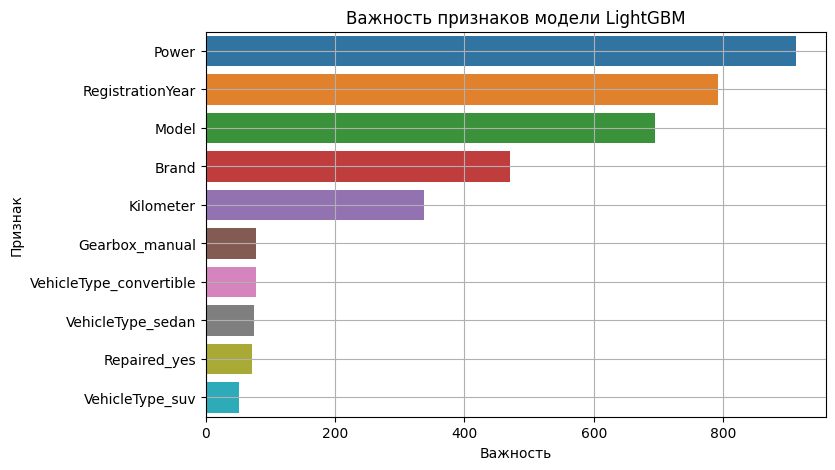

In [125]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=important.head(10)[0], y=important.head(10).index)
ax.set_xlabel('Важность')
ax.set_ylabel('Признак')
ax.set_title('Важность признаков модели LightGBM')
ax.grid();

### Проверка на адекватность

Выведем результаты, которые покажет модель DummyClassifier с разными алгоритмами и сравним их с полученными выше результатами на тестовой выборке.

In [ ]:
strategy = ['mean', 'median'] # алгоритм
for strat in strategy:
    model = DummyRegressor(
        strategy=strat)
    model.fit(X_train, y_train)
    answer = model.predict(X_test)
    error = mean_squared_error(y_test, answer, squared=False)
    (print(f'Dummy модель со стратегией {strat} показала результат: {error.round(3)}'))

Качество модели LightGBM явно лучше (1505), чем у константных моделей.

**Вывод:** В рамках решения задачи были выполнены следующие этапы:
- проведены исследование и предобработка данных,
- проверена мультиколлинеарность,
- обработаны пропуски,
- выполнена проверка на дубликаты,
- обучены несколько моделей: линейной регрессии, случайного леса и градиентного бустинга,
- проведено сравнение резульатов по нескольким показателям,
- выведена важность признаков,
- выбранная модель проверена на адекватность.

По итогам исследования выбрана модель LightGBM, так как она показала наилучшую метрику качества (менее 2500), не сильно уступая при этом в скорости обучения. В скорости прогнозирования лидером является обычная линейная модель, но в данном случае десятые доли секунд несущественны.

Наиболее важными параметрами для обучения оказались: год регистрации автомобиля, мощность двигателя, бренд и модель автомобиля, а также суммарный пробег.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей